## Importing Library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the dataset

In [2]:
raw_data = pd.read_csv("1.03. Dummies.csv")

## Peeking the dataset

In [3]:
raw_data.head(5)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [4]:
data = raw_data.copy()

## Making categerical data into numerical one

In [5]:
data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0})

In [6]:
data.head(4)

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0


## Describe the data so we can see that about 46% of the student having 75 percenatge attendance 

In [7]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [8]:
y = data['GPA']
x = data[['SAT','Attendance']]

## Using OLS

In [9]:
x1 = sm.add_constant(x)
result = sm.OLS(y,x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           2.19e-15
Time:                        11:25:15   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## We can now see the difference between the student who have attending the college have better chance (Green line)

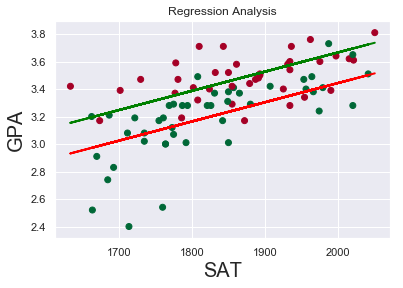

In [10]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.6439 + 0.0014*data['SAT'] + 0.2226
fig = plt.plot(data['SAT'],yhat_no,lw=2,c='Red')
fig = plt.plot(data['SAT'],yhat_yes,lw=2,c='Green')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.title('Regression Analysis')
plt.show()

## Lets make some prediction with the Regression fitted data

In [11]:
x1.head()

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0


In [12]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})

In [13]:
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


## We will use predict method in fitted modal of statsmodel

In [16]:
prediction = result.predict(new_data)
prediction

0    3.023513
1    3.204163
dtype: float64

In [17]:
predictiondf = pd.DataFrame({'Predictions':prediction})
sample = new_data.join(predictiondf)
sample

,const,SAT,Attendance,Predictions
0,1,1700,0,3.023513
1,1,1670,1,3.204163


In [ ]:
s